In [16]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv('wine_data.csv',header=None,usecols=[0,1,2])
df.columns=['Class label', 'Alcohol', 'Malic acid']

In [18]:
df

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

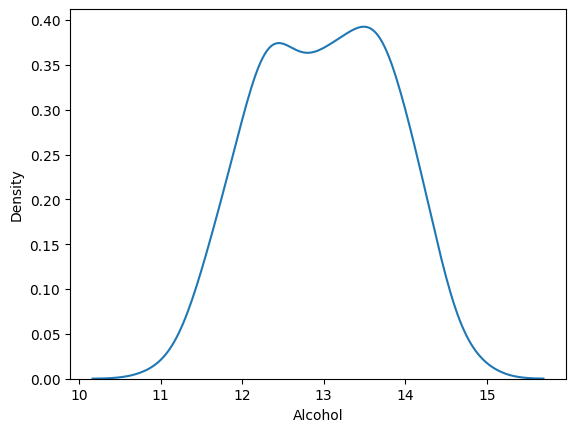

In [19]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Malic acid', ylabel='Density'>

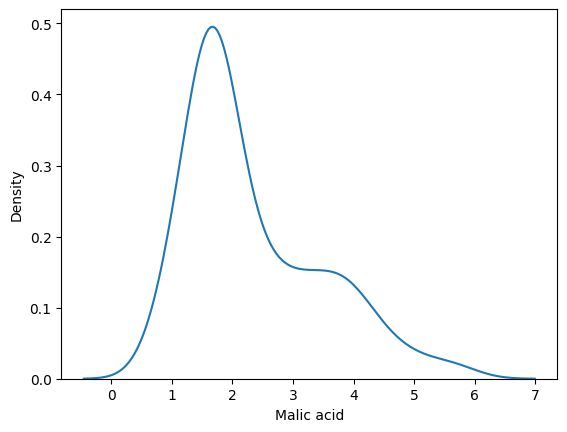

In [20]:
sns.kdeplot(df['Malic acid'])

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

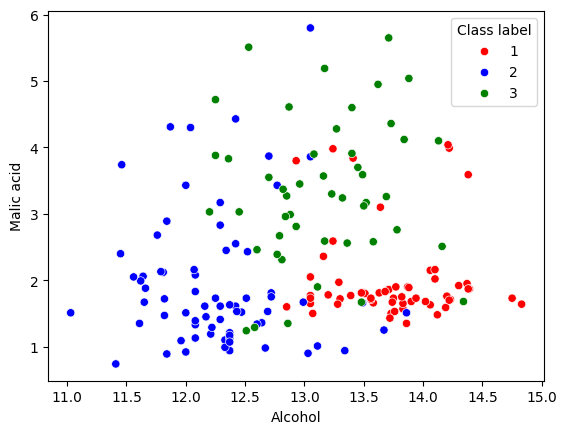

In [21]:
color_dict={1:'red',3:'green',2:'blue'}
sns.scatterplot(data=df,x='Alcohol',y='Malic acid',hue='Class label',palette=color_dict)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class label', axis=1),
                                                    df['Class label'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((124, 2), (54, 2))

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [25]:
np.round(X_train.describe(), 1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [26]:
np.round(X_train_scaled.describe(), 1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


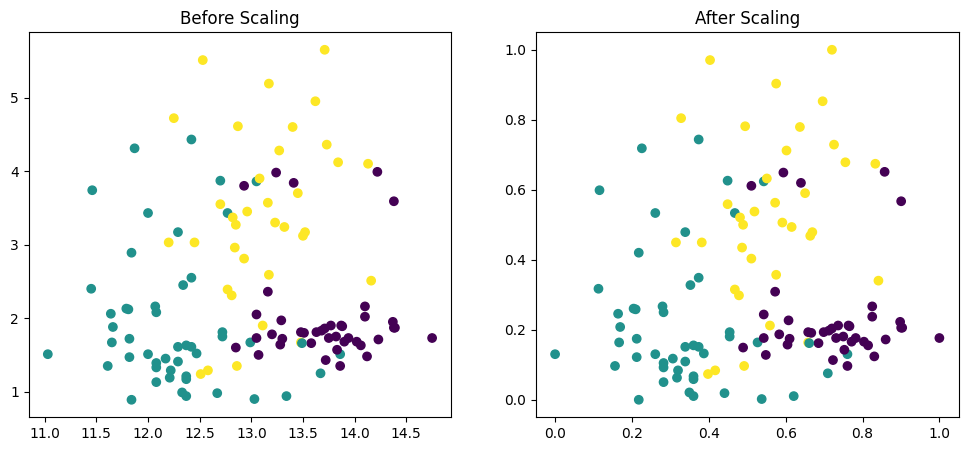

In [27]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Alcohol'], X_train['Malic acid'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic acid'],c=y_train)
ax2.set_title("After Scaling")
plt.show()

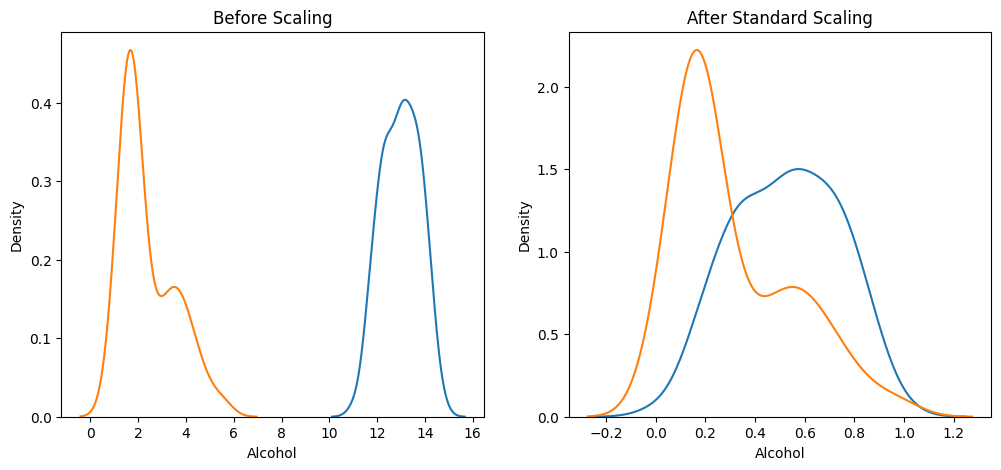

In [28]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()

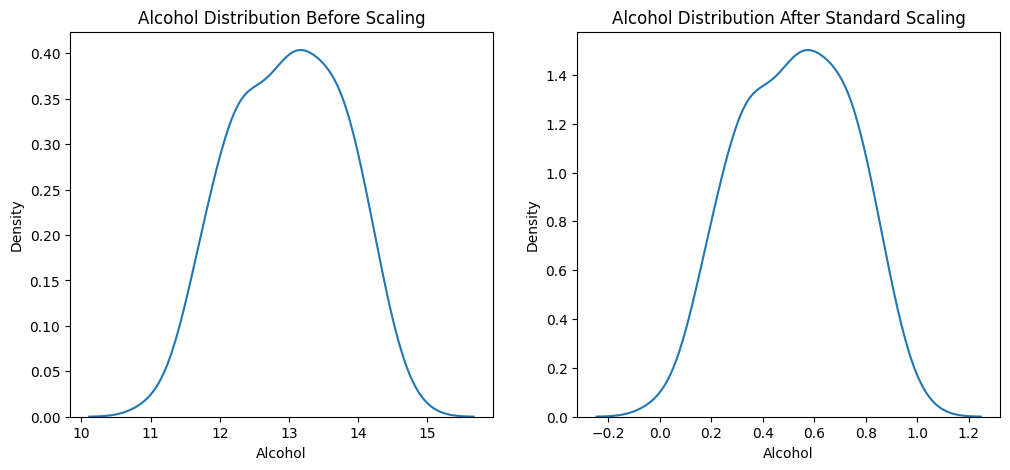

In [29]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Alcohol Distribution Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)

# after scaling
ax2.set_title('Alcohol Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
plt.show()

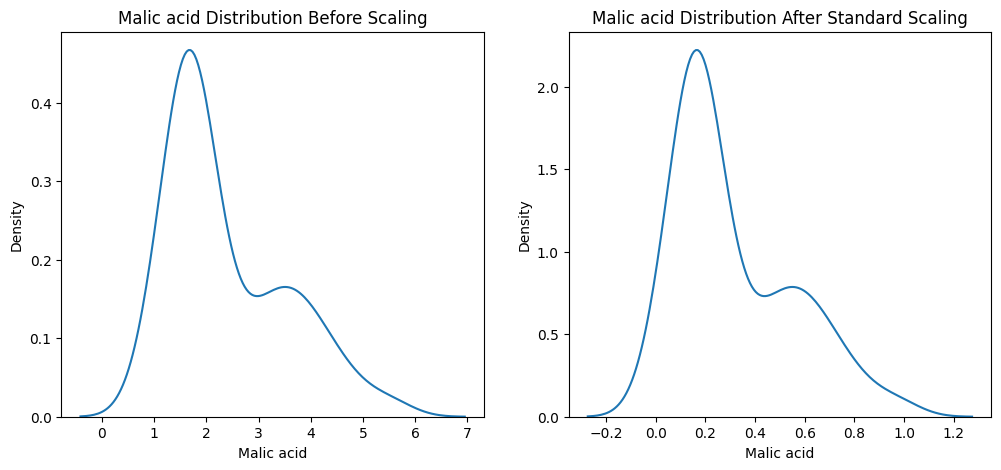

In [30]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Malic acid Distribution Before Scaling')
sns.kdeplot(X_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('Malic acid Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()

In [36]:
from sklearn.preprocessing import MaxAbsScaler

scaler_maxabs = MaxAbsScaler()

# fit the scaler to the train set, it will learn the parameters
scaler_maxabs.fit(X_train)

# transform train and test sets
X_train_maxabs = scaler_maxabs.transform(X_train)
X_test_maxabs = scaler_maxabs.transform(X_test)

In [38]:
X_train_maxabs = pd.DataFrame(X_train_maxabs, columns=X_train.columns)
X_test_maxabs = pd.DataFrame(X_train_maxabs, columns=X_test.columns)

In [39]:
np.round(X_train.describe(),1)


,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [40]:
np.round(X_train_maxabs.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.9,0.4
std,0.1,0.2
min,0.7,0.2
25%,0.8,0.3
50%,0.9,0.3
75%,0.9,0.6
max,1.0,1.0


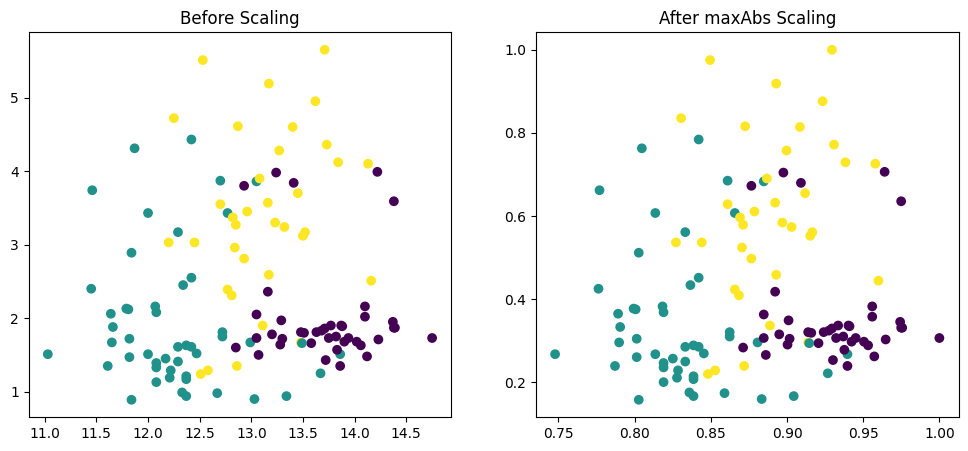

In [52]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Alcohol'], X_train['Malic acid'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_maxabs['Alcohol'], X_train_maxabs['Malic acid'],c=y_train)
ax2.set_title("After maxAbs Scaling")
plt.show()

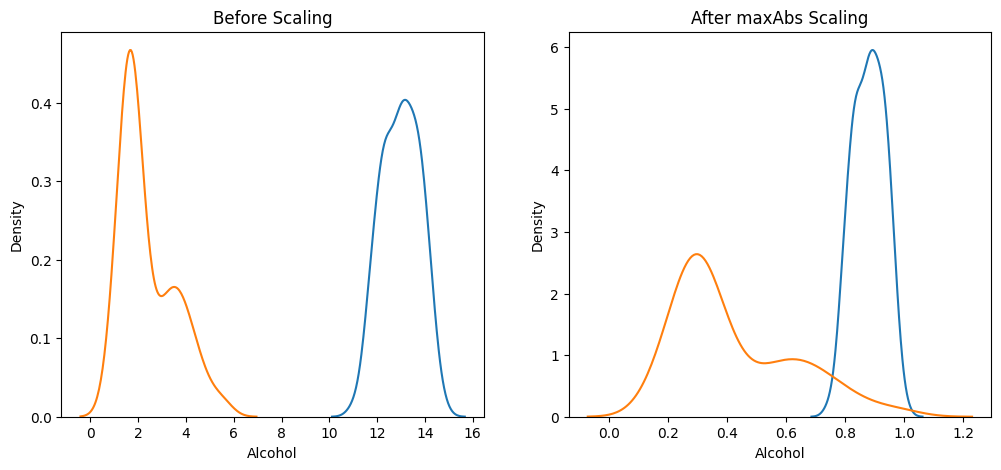

In [54]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('After maxAbs Scaling')
sns.kdeplot(X_train_maxabs['Alcohol'], ax=ax2)
sns.kdeplot(X_train_maxabs['Malic acid'], ax=ax2)
plt.show()

In [53]:
from sklearn.preprocessing import RobustScaler

scaler_RobustScaler = RobustScaler()

# fit the scaler to the train set, it will learn the parameters
scaler_RobustScaler.fit(X_train)

# transform train and test sets
X_train_RobustScaler = scaler_RobustScaler.transform(X_train)
X_test_RobustScaler = scaler_RobustScaler.transform(X_test)

In [44]:
X_train_RobustScaler = pd.DataFrame(X_train_RobustScaler, columns=X_train.columns)
X_test_RobustScaler = pd.DataFrame(X_test_RobustScaler, columns=X_test.columns)

In [45]:
np.round(X_train.describe(),1)


,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [46]:
np.round(X_train_RobustScaler.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,-0.0,0.3
std,0.6,0.7
min,-1.6,-0.6
25%,-0.5,-0.2
50%,0.0,0.0
75%,0.5,0.8
max,1.3,2.3


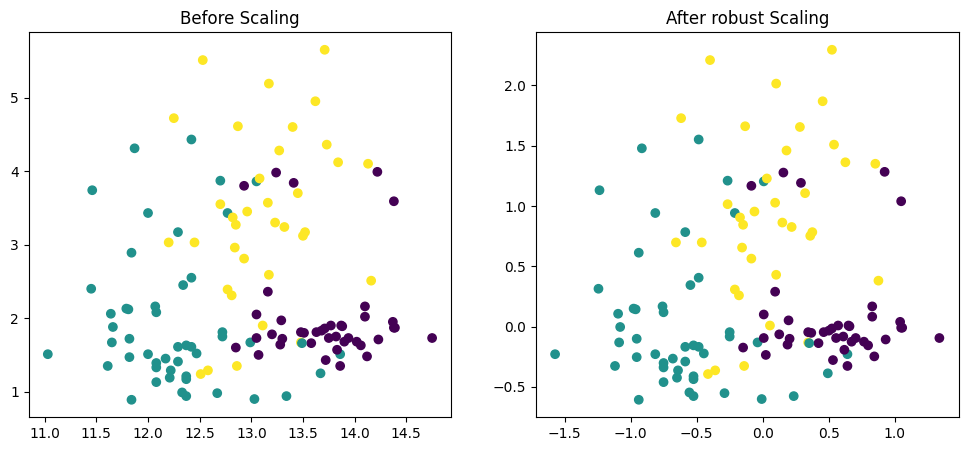

In [50]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Alcohol'], X_train['Malic acid'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_RobustScaler['Alcohol'], X_train_RobustScaler['Malic acid'],c=y_train)
ax2.set_title("After robust Scaling")
plt.show()

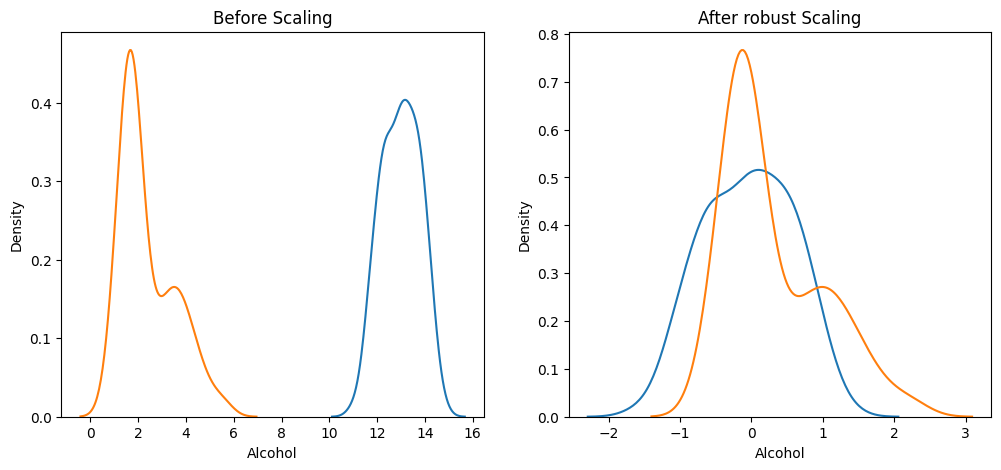

In [49]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('After robust Scaling')
sns.kdeplot(X_train_RobustScaler['Alcohol'], ax=ax2)
sns.kdeplot(X_train_RobustScaler['Malic acid'], ax=ax2)
plt.show()

We don't have any class for mean Normalization in sklearn so we created class

In [55]:
class MeanNormalization:

    def __init__(self):
        self.mean_ = None
        self.min_ = None
        self.max_ = None
    
    def fit(self, x):
        x = np.array(x, dtype = float)
        self.mean_ = np.mean(x, axis=0)
        self.min_ = np.min(x, axis=0)
        self.max_ = np.max(x, axis=0)
        return self
    
    def transform(self, x):
        x = np.array(x, dtype=float)
        return (x - self.mean_) / (self.max_ - self.min_)
    
    def fit_transform(self, x):
        return self.fit(x).transform(x)
    



In [56]:
    

scaler_MeanNorm = MeanNormalization()

# fit the scaler to the train set, it will learn the parameters
scaler_MeanNorm.fit(X_train)

# transform train and test sets
X_train_meanNorm = scaler_MeanNorm.transform(X_train)
X_test_meanNorm = scaler_MeanNorm.transform(X_test)

In [57]:
X_train_meanNorm = pd.DataFrame(X_train_meanNorm, columns=X_train.columns)
X_test_meanNorm = pd.DataFrame(X_test_meanNorm, columns=X_test.columns)

In [58]:
np.round(X_train.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [59]:
np.round(X_train_meanNorm.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,-0.0,-0.0
std,0.2,0.2
min,-0.5,-0.3
25%,-0.2,-0.2
50%,0.0,-0.1
75%,0.2,0.2
max,0.5,0.7


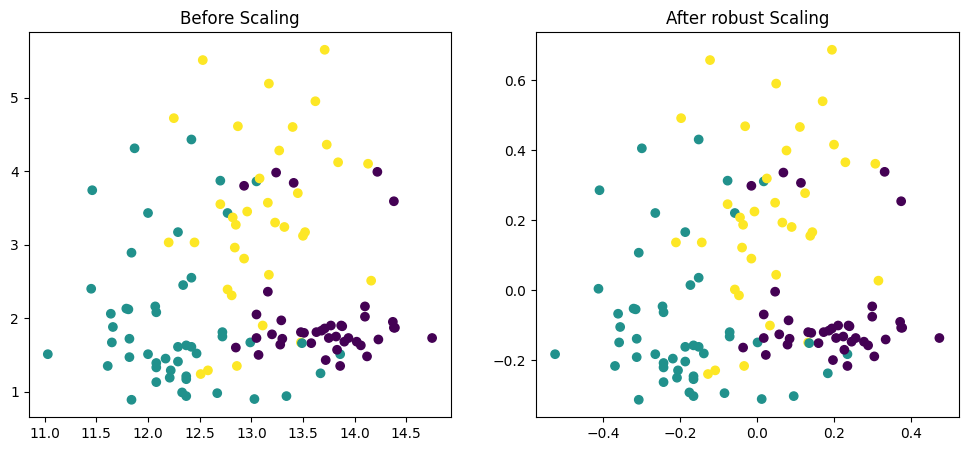

In [60]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Alcohol'], X_train['Malic acid'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_meanNorm['Alcohol'], X_train_meanNorm['Malic acid'],c=y_train)
ax2.set_title("After robust Scaling")
plt.show()

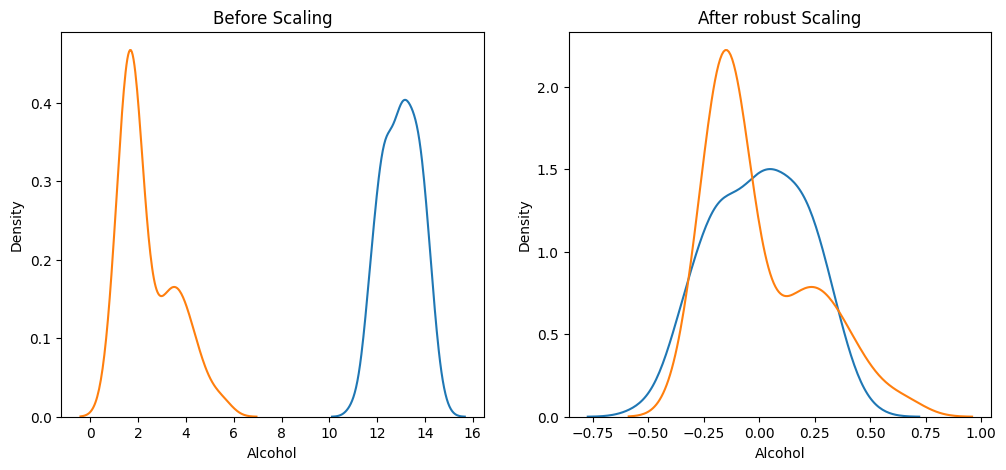

In [61]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('After robust Scaling')
sns.kdeplot(X_train_meanNorm['Alcohol'], ax=ax2)
sns.kdeplot(X_train_meanNorm['Malic acid'], ax=ax2)
plt.show()